## 학습정리

### 21장. 자연어 처리
* 자연어 처리(natural language processing, NLP) : 언어에 대한 계산적 기술

####  21.1 워드 클라우드
* 워드 클라우드 : 단어의 크기를 단어의 개수에 비례하도록 보여주는 시각화 방법
    * 단어의 위치가 어떤한 의미도 가지지 않기 떄문에 데이터 과학자들은 선호하지 않음
    * 축에 의미를 넣어서 위치도 의미를 갖게 표현 할 수도 있다.

####  21.2 n-그램 언어모델
* ex. 데이터 과학에 관한 수천개의 웹페이지를 만들어서 검색 엔진의 순위를 높이는 전략을 사용?
    * 프로그래밍으로 웹사이트를 대량으로 만들어 낼 방법 ? 
        * 문서가 여러 개 있는 말뭉치(corpus, 코퍼스)를 구해서 언어에 대한 통계적 모델을 만드는 것
        * requests와 Beautiful Soup 라이브러리를 사용해서 데이터 수집
            * 신경 쓸 몇가지 이슈
                1. 텍스트 안의 따옴표가 유니코드 문자 u"\u2019" -> 아스키 따옴표로 바꾸는 함수
                2. 마침표를 기준으로 웹페이지 안의 텍스트에서 문장들을 뽑아보기 (re.findall)
                3. 텍스트를 단어의 열로 만든뒤 모델링
                    1. 시작단어 설정
                    2. 시작단어 다음에 등장하는 단어를 확인한뒤 임의로 선택해서 다음단어가 되게 함
                    3. 문장의 끝을 나타내는 마침표가 등장할 때까지 이 과정을 계속 반복
                        * 바이그램(bigram,2-gram) 빈도를 사용 : 바이그램 모델 
                        * 세 개의 연속 단어를 보는 트라이그램(trigram)을 사용하면 문장을 조금 더 그럴 듯하게 만들 수 있다. 
                            * 각 단계에서 선택할 수 있는 단어의 수가 바이그램 때 보다 훨씬 적어지고, 많은 경우 딱 하나의 단어만 선택 가능
                            * 원문의 문장을 그대로 생성할 가능성도 높아짐
                            * 더 많은 데이터로 계산 할수록 성능은 더욱 좋아질 것

####  21.3 문법 규칙
* 문법에 맞는 문장을 생성할 수 있도록 문법 규칙을 사용해서 언어를 모델링 
####  21.4 여담 : 깁스 샘플링
####  21.5 토픽 모델링
####  21.6 단어 벡터
####  21.7 재귀 신경망
####  21.8 예시 : 문자 단위의 RNN 사용하기
####  21.9 더 공부해 보고 싶다면


## code

In [18]:
import random

In [1]:
data = [("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
        ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60), 
        ("data science", 60, 70), ("analytics", 90, 3), ("team player", 85, 85), 
        ("dynamic", 2, 90), ("synergies" , 70, 0), ("actionalble insights", 40, 30),
        ("think out of the box", 45, 10), ("self-starter", 30, 50), ("customer focus", 65, 15),
        ("thought leadership", 35, 35)]


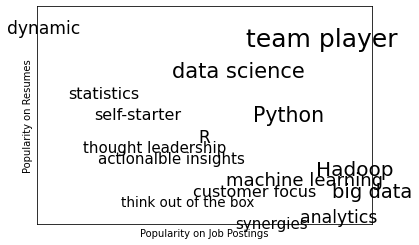

In [2]:
# 워드 클라우드는 축에 대한 정보가 담겨있지 않음
# 축에 의미를 부여하려면 ?
# x축에는 채용공고에 등장하는 빈도
# y축에는 이력서에 등장하는 빈도


from matplotlib import pyplot as plt

def text_size(total : int) -> float :
    """total이 0이면 8, total이 200이면 28을 반환"""
    return 8 + total / 200 * 20

for word, job_popularity, resume_popularity in data :
    plt.text(job_popularity, resume_popularity, word,
             ha = 'center', va = 'center',
             size = text_size(job_popularity + resume_popularity))

plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
# 텍스트 안의 따옴표가 유니코드 문자 u"\u2019" -> 아스키 따옴표로 바꾸는 함수
def fix_unicode(text: str) -> str :
    return text.replace(u"\u2019", "'")



In [13]:
# 마침표를 기준으로 웹페이지 안의 텍스트에서 문장들을 뽑음

import re
from bs4 import BeautifulSoup
import requests


url = "https://www.oreilly.com/radar/what-is-data-science"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

content = soup.find("div", "main-post-radar-content") # article-body div를 찾아라
regex = r"[\w']+|[\.]"                     # 단어 또는 마침표를 찾아라 

document = []

for paragraph in content("p") :
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)



In [14]:
from collections import defaultdict

transitions = defaultdict(list)
for prev, current in zip(document, document[1:]) :
    transitions[prev].append(current)
    

In [15]:
def generate_using_bigrams() -> str :
    current = "." # 마침표의 다음 단어가 문장을 새로 시작 
    result = []
    while True :
        next_word_candidates = transitions[current]
        current = random.choice(next_word_candidates)
        result.append(current)
        if current == ".": return " ".join(result)
        

In [23]:
generate_using_bigrams()

'If youâ ve taken advantage of this video is that appears intractable .'

In [24]:
# trigram

trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in zip(document, document[1:], document[2:]) :
    if prev == "." :              # 직전 단어가 마침표라면
        starts.append(current)    # current는 시작 단어가 될 수 있다.
    
    trigram_transitions[(prev, current)].append(next)
    

In [25]:
# 시작 단어를 따로 관ㄹ리
def generate_using_trigrams() -> str :
    current = random.choice(starts) # 임의의 시작 단어를 정한 후 
    prev = "." # 마침표를 앞에 덧붙인다.
    result = [current]
    while True :
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)
        
        prev, current = current, next_word
        result.append(current)
        
        if current == "." :
            return " ".join(result)
        

In [27]:
generate_using_trigrams()

'Entrepreneurship is another piece of the art particularly if you can split your task up into a state where itâ s possible to precompute much of the data out if it isnâ t going to be widely applicable to many large data problems ranging from gigabytes to petabytes of data thatâ s not really necessary for the time you use it and where it comes close to providing â one stop shoppingâ for most statistical work .'